In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import SVC,LinearSVC,NuSVC

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('P6_P7_spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df[['v1','v2']]

In [4]:
df.columns=['label','message']

In [5]:
def processing_text(message):
    msg_nopunc=[c for c in message if c not in string.punctuation]
    msg_nopunc=''.join(msg_nopunc)
    return [w for w in msg_nopunc.split() if w.lower() not in stopwords.words('english')]

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=0)

In [8]:
bow_transformer=CountVectorizer(analyzer=processing_text).fit(X_train)
mess_trans=bow_transformer.transform(X_train)
tfidf_transformer=TfidfTransformer(use_idf=False)
mess_tfidf=tfidf_transformer.transform(mess_trans)

In [9]:
mess_bow1=bow_transformer.transform(X_test)
tfidf_transformer1=TfidfTransformer(use_idf=False)
mess_tfidf1=tfidf_transformer1.transform(mess_bow1)

In [10]:
svc=LinearSVC()
svc.fit(mess_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
y_pred=svc.predict(mess_tfidf1)

             precision    recall  f1-score   support

        ham       0.85      1.00      0.92       949
       spam       0.00      0.00      0.00       166

avg / total       0.72      0.85      0.78      1115

[[949   0]
 [166   0]]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


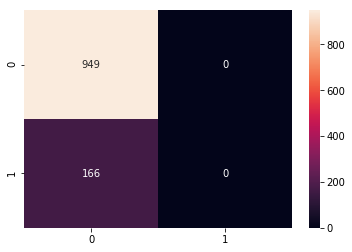

In [19]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [13]:
accuracy_score(y_test,y_pred)

0.9829596412556054

In [14]:
svc=SVC()
svc.fit(mess_tfidf,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred=svc.predict(mess_tfidf1)

In [16]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

        ham       0.85      1.00      0.92       949
       spam       0.00      0.00      0.00       166

avg / total       0.72      0.85      0.78      1115

[[949   0]
 [166   0]]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
accuracy_score(y_test,y_pred)

0.8511210762331839